# Data Science Job Salaries Dataset

## Overview

This dataset contains details regarding the salaries of different Data science professionals all over the world based on factors like employment type, company location, etc. for the year 2020

# Description Feature

- work_year - The year the salary was paid
- experience_level - The experience level in the job during the year with the following possible values:
   - EN Entry-level / Junior
   - MI Mid-level / Intermediate
   - SE Senior-level/ Expert
   - EX Executive-level / Director
- employment_type - The type of employement for the role:
   - PT Part-time
   - FT Full-time
   - CT Contract
   - FL Freelance
- job_title - The role worked in during the year
- salary - The total gross salary amount paid.
- salary_currency - The currency of the salary paid as an ISO 4217 currency code.
- salary_in_usd - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)
- employee_residence - Employee's primary country of residence in during the work year as an ISO 3166 country code
- remote_ratio - The overall amount of work done remotely, possible values are as follows:
   - 0 No remote work (less than 20%)
   - 50 Partially remote
   - 100 Fully remote (more than 80%)
- company_location - The country of the employer's main office or contracting branch as an ISO 3166 country code
- company_size - The average number of people that worked for the company during the year:
   - S less than 50 employees (small)
   - M 50 to 250 employees (medium)
   - L more than 250 employees (large)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set_theme(style="dark")
sns.set()

In [4]:
#  First Step  Reading Data 
data = pd.read_csv('./job_salaries/ds_salaries.csv',index_col=0)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
#  Show Data info before clean it
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [4]:
data.shape

(607, 11)

In [7]:
# Seacond Step cleanign data from  duplicate and NAN
job_salaries = data.dropna()
job_salaries = data.drop_duplicates()

In [10]:
job_salaries.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [12]:
job_salaries.describe().astype(int)

,work_year,salary,salary_in_usd,remote_ratio
count,565,565,565,565
mean,2021,338115,110610,69
std,0,1599878,72280,40
min,2020,4000,2859,0
25%,2021,67000,60757,50
50%,2021,110925,100000,100
75%,2022,165000,150000,100
max,2022,30400000,600000,100


In [13]:
job_salaries.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,565,565,565,565,565,565,565
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,243,546,130,359,295,318,290


C:\Users\VISION\AppData\Local\Temp\ipykernel_17328\193240160.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(job_salaries.corr(), annot=True)


<AxesSubplot: >

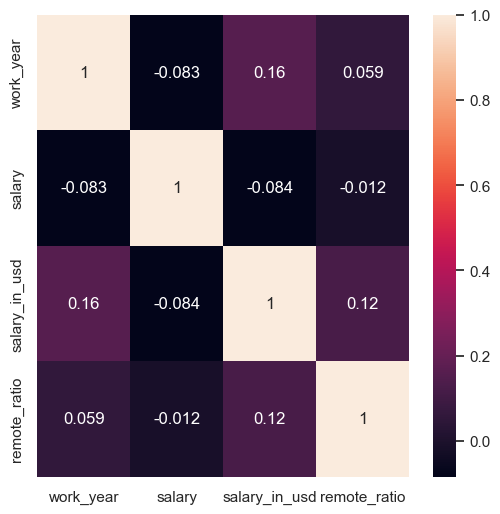

In [14]:
#Visualize Correlations in a heatmap

plt.figure(figsize=(6,6))
sns.heatmap(job_salaries.corr(), annot=True)

In [8]:
#  Show Data info after clean it
job_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    int64 
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.0+ KB


# First summary to previous working

- The Dataset contains 607 records and 12 features (607,11).
- There are no missing values in the dataset.
- Data contains values from 2020 to 2022 Work Year
- There are 4 unique experience levels with SE occuring 280 times.
- The Dataset contains 4 employment types; FT (Full time employment) is the most common type occurring 588 instances).
- There are 50 unique job titles.
- Salary is recorded in 17 different currencies.
- Employees are resident in 57 locations while the Companies are located in 50 locations.

In [9]:
job_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [16]:
#  Replace experience level with full name to it
job_salaries.experience_level.replace({'EN':'Entry-Level/Junior','MI':'Mid-level/Intermediate','SE':'Senior-level/Expert','EX':'Executive-level/Director'}, inplace=True)

C:\Users\VISION\AppData\Local\Temp\ipykernel_17328\52149747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_salaries.experience_level.replace({'EN':'Entry-Level/Junior','MI':'Mid-level/Intermediate','SE':'Senior-level/Expert','EX':'Executive-level/Director'}, inplace=True)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level/Intermediate,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,Senior-level/Expert,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,Senior-level/Expert,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,Mid-level/Intermediate,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,Senior-level/Expert,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Working on Expeience Level

We note that expeience level as a categorical variables beacause we divide it into groups.

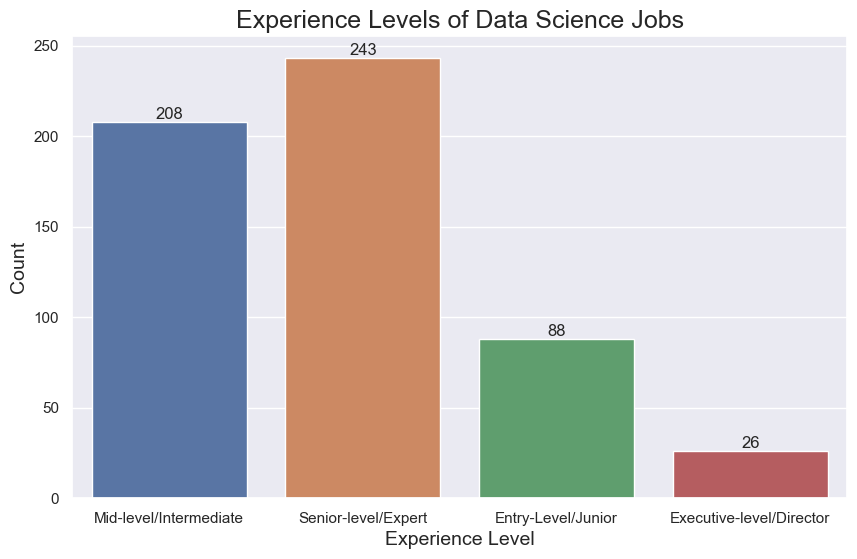

In [21]:
plt.figure(figsize=(10,6))
plt.title('Experience Levels of Data Science Jobs', fontsize=18)
ax = sns.countplot (x='experience_level', data=job_salaries)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## We now show the percentage for each expeience level and display them in pie chart

In [27]:
# Calculate ratio
# we passed normlized as true to get values in percentage 
experience_level_ratio = job_salaries.experience_level.value_counts(normalize=True)
print(experience_level_ratio)

Senior-level/Expert         0.430088
Mid-level/Intermediate      0.368142
Entry-Level/Junior          0.155752
Executive-level/Director    0.046018
Name: experience_level, dtype: float64


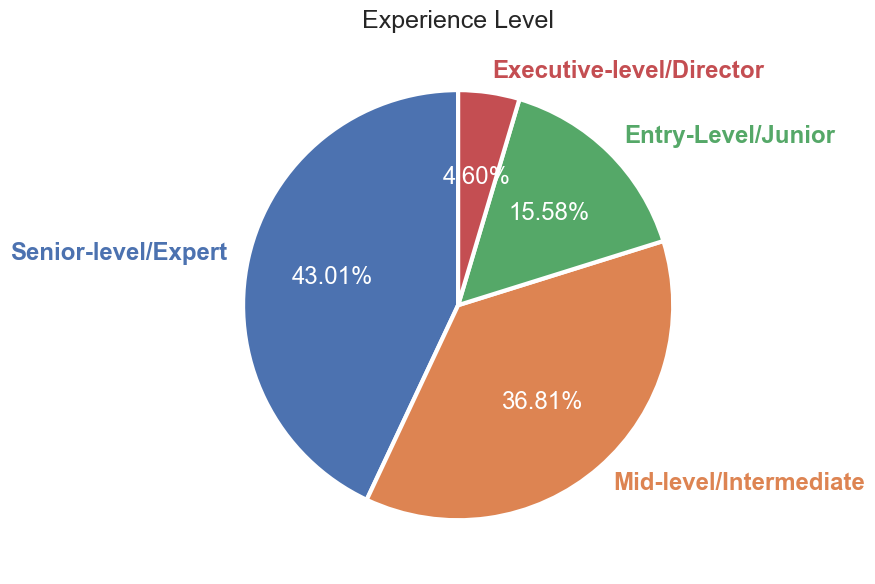

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
x=experience_level_ratio

labels = ['Senior-level/Expert','Mid-level/Intermediate','Entry-Level/Junior','Executive-level/Director']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Experience Level', fontsize=18)
plt.tight_layout()

#### From previous pie chat we will note that the high percentage is Senior level that means the most of jobs required with senior level

# Working on Job Title

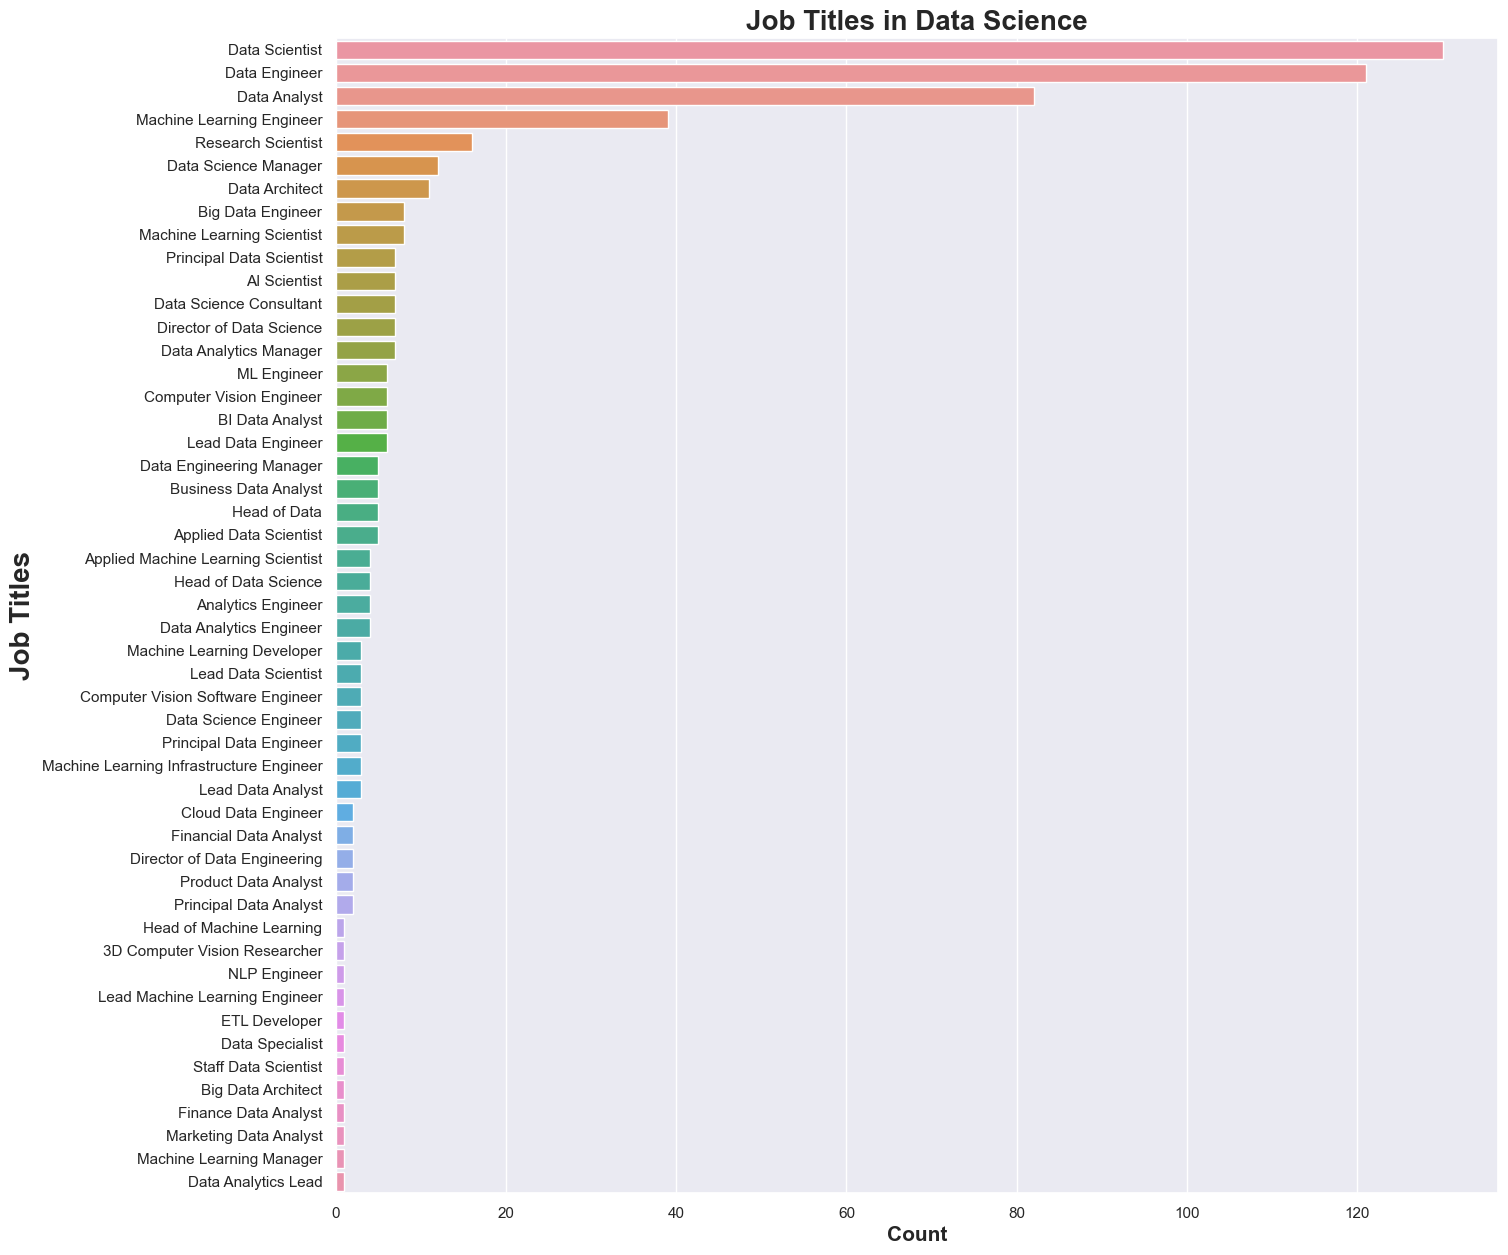

In [30]:
# First we will show all job titles that we have
order_job = job_salaries['job_title'].value_counts().index
plt.figure(figsize=(15,15))
plt.title('Job Titles in Data Science', fontsize=20, fontweight='bold')
sns.countplot(y='job_title', data=job_salaries, order=order_job)
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Job Titles', fontsize=20, fontweight='bold')
plt.show()

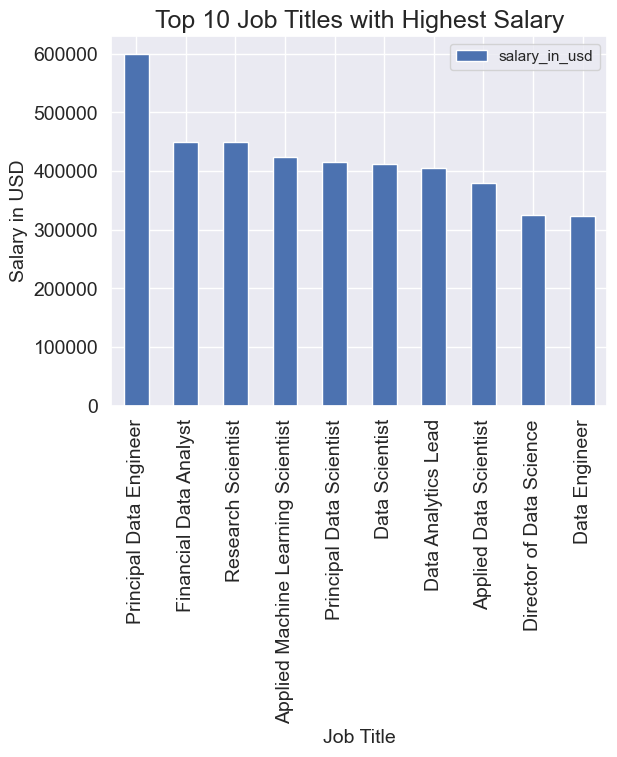

In [43]:
# Show the top 10 highest salary
title_sal_pivot = pd.pivot_table(data=job_salaries,index=['job_title'],values=['salary_in_usd'], aggfunc='max').sort_values(by=['salary_in_usd'],ascending=False)
title_sal_pivot.head(10).plot.bar()
plt.title('Top 10 Job Titles with Highest Salary', fontsize=18)
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Woking on Employment Type

In [ ]:
job_salaries.employment_type.replace({'PT':'Part-time','FT':'Full-time','CT':'Contract','FL':'Freelance'}, inplace=True)


In [31]:
employment_type_ratio = job_salaries.employment_type.value_counts(normalize=True)
print(employment_type_ratio)

FT    0.966372
PT    0.017699
CT    0.008850
FL    0.007080
Name: employment_type, dtype: float64


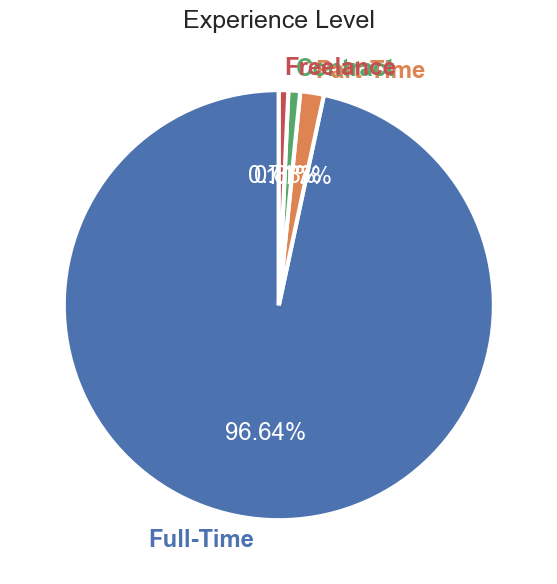

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
x=employment_type_ratio

labels = ['Full-Time','Part-Time','Contract','Freelance']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Experience Level', fontsize=18)
plt.tight_layout()

#### in previous pie chart the result show that almost all jobs are Full-Time

# Show Company Size 

C:\Users\VISION\AppData\Local\Temp\ipykernel_17328\3741320093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_salaries.company_size.replace({'S':'Small(<50)','M':'Medium(50-250)','L':'Large(>250)'}, inplace=True)


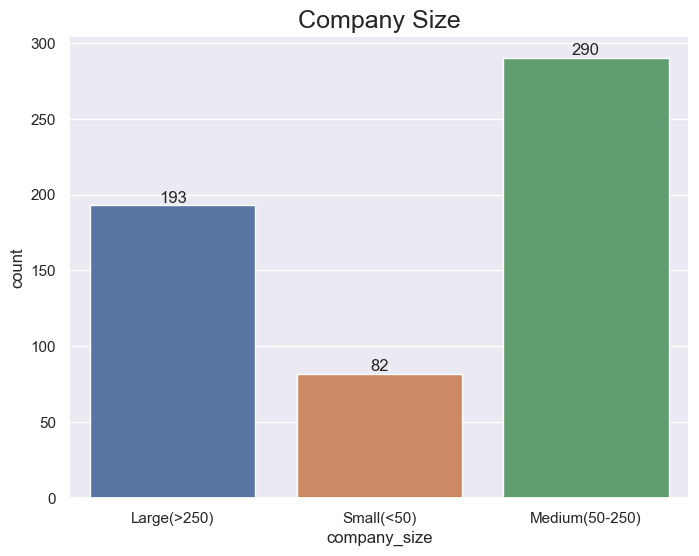

In [33]:
# Rename Company Size
job_salaries.company_size.replace({'S':'Small(<50)','M':'Medium(50-250)','L':'Large(>250)'}, inplace=True)

plt.figure(figsize=(8,6))
plt.title('Company Size', fontsize=18)
ax = sns.countplot (x='company_size', data=job_salaries)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

#### Most of companies are medium size

### From previous chart we note all data that working on it are categorical data and Know we will work on numerical data

# Salary 

<AxesSubplot: xlabel='work_year', ylabel='salary_in_usd'>

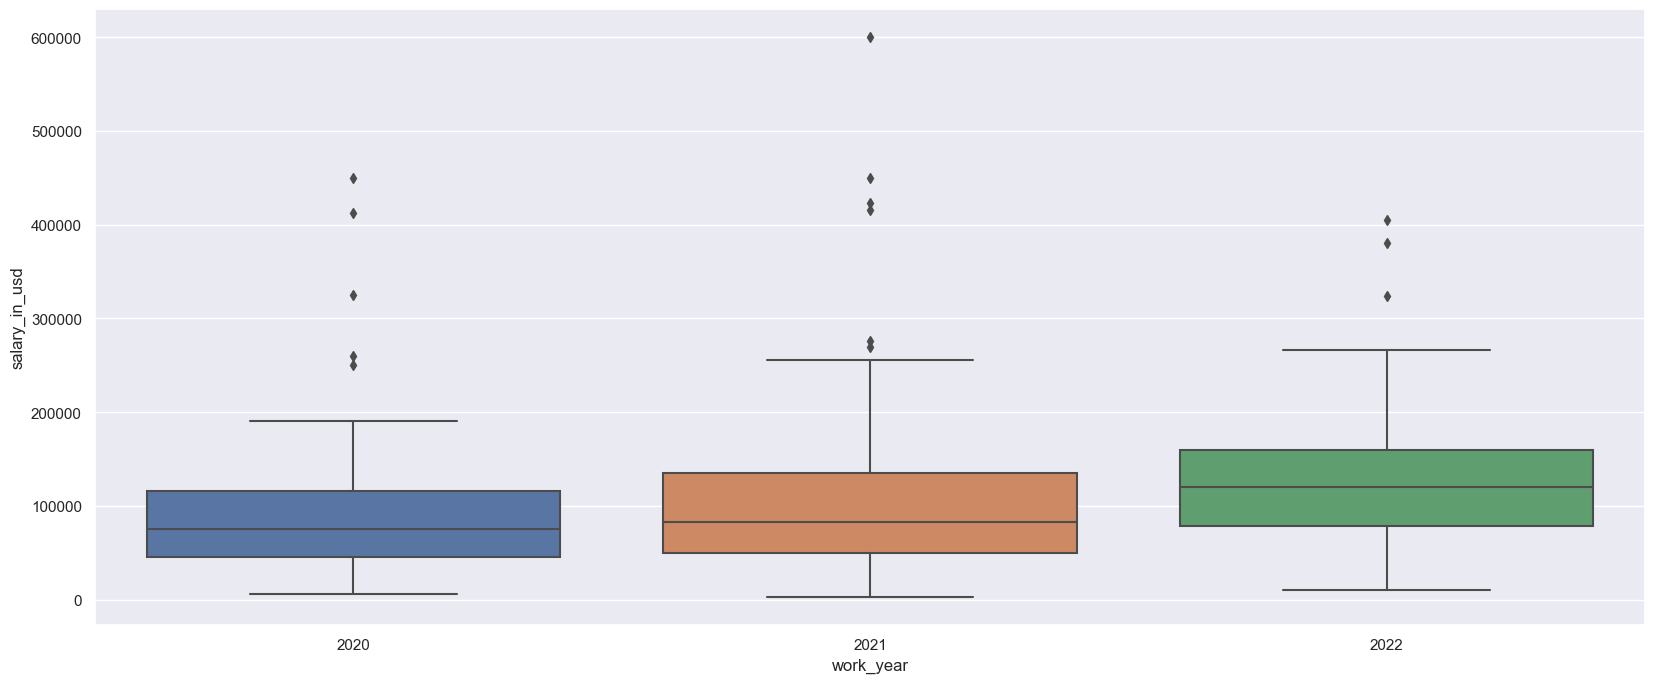

In [38]:
# First we will show Salary by work year
fig,axes=plt.subplots(1,1,figsize=(20,8))

sns.boxplot(ax=axes,x='work_year',y='salary_in_usd', data=job_salaries)

#### Salary with expeience level

<AxesSubplot: xlabel='experience_level', ylabel='salary_in_usd'>

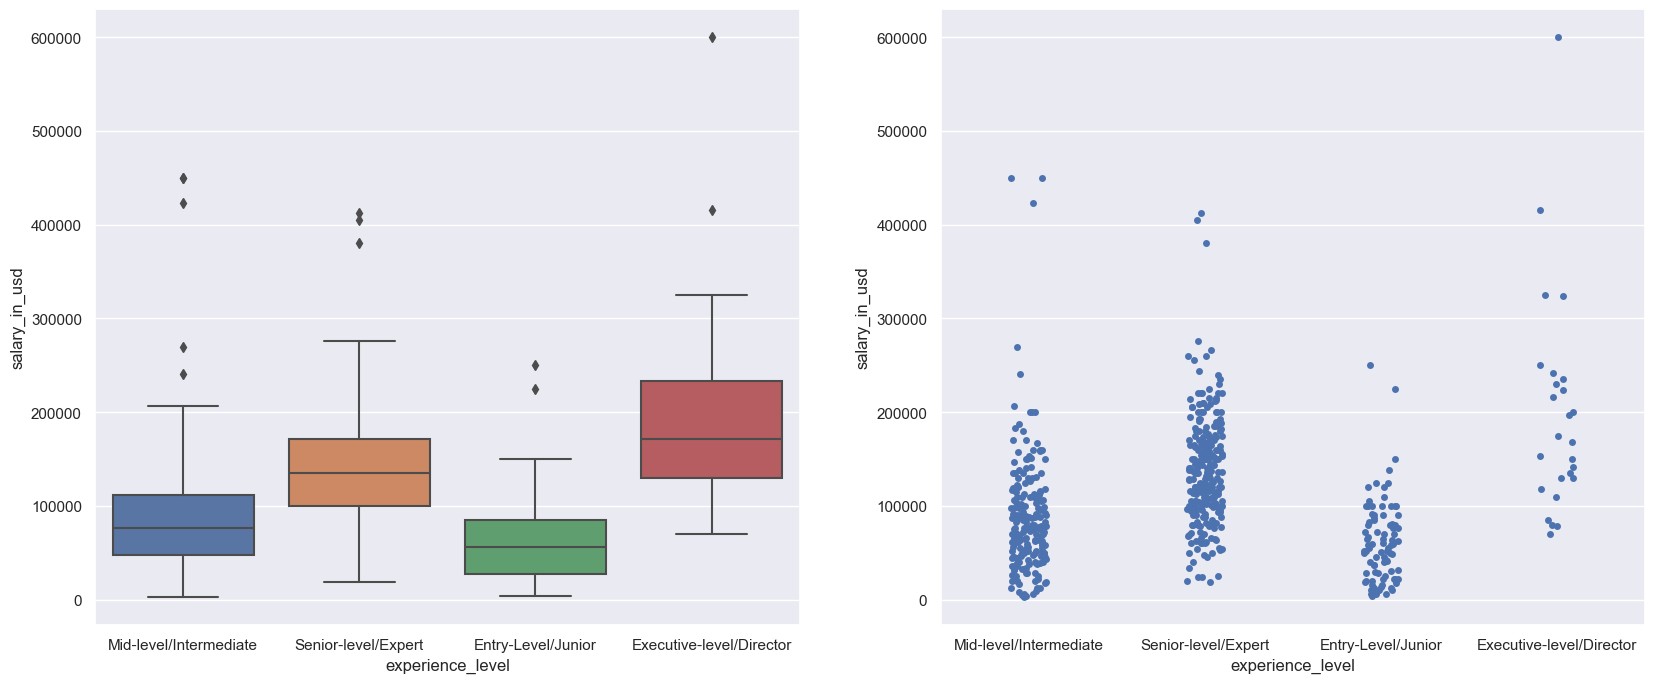

In [41]:
fig,axes=plt.subplots(1,2,figsize=(20,8))

sns.boxplot(ax=axes[0],x='experience_level',y='salary_in_usd', data=job_salaries)
sns.stripplot(ax=axes[1],x='experience_level',y='salary_in_usd', data=job_salaries)

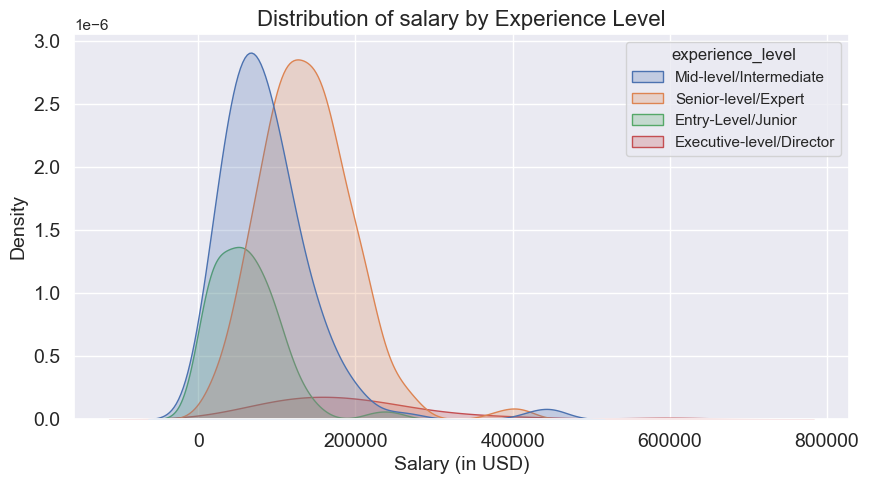

In [40]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=job_salaries, x='salary_in_usd', hue='experience_level', fill=True)
plt.title("Distribution of salary by Experience Level", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#### Salary with Company Location


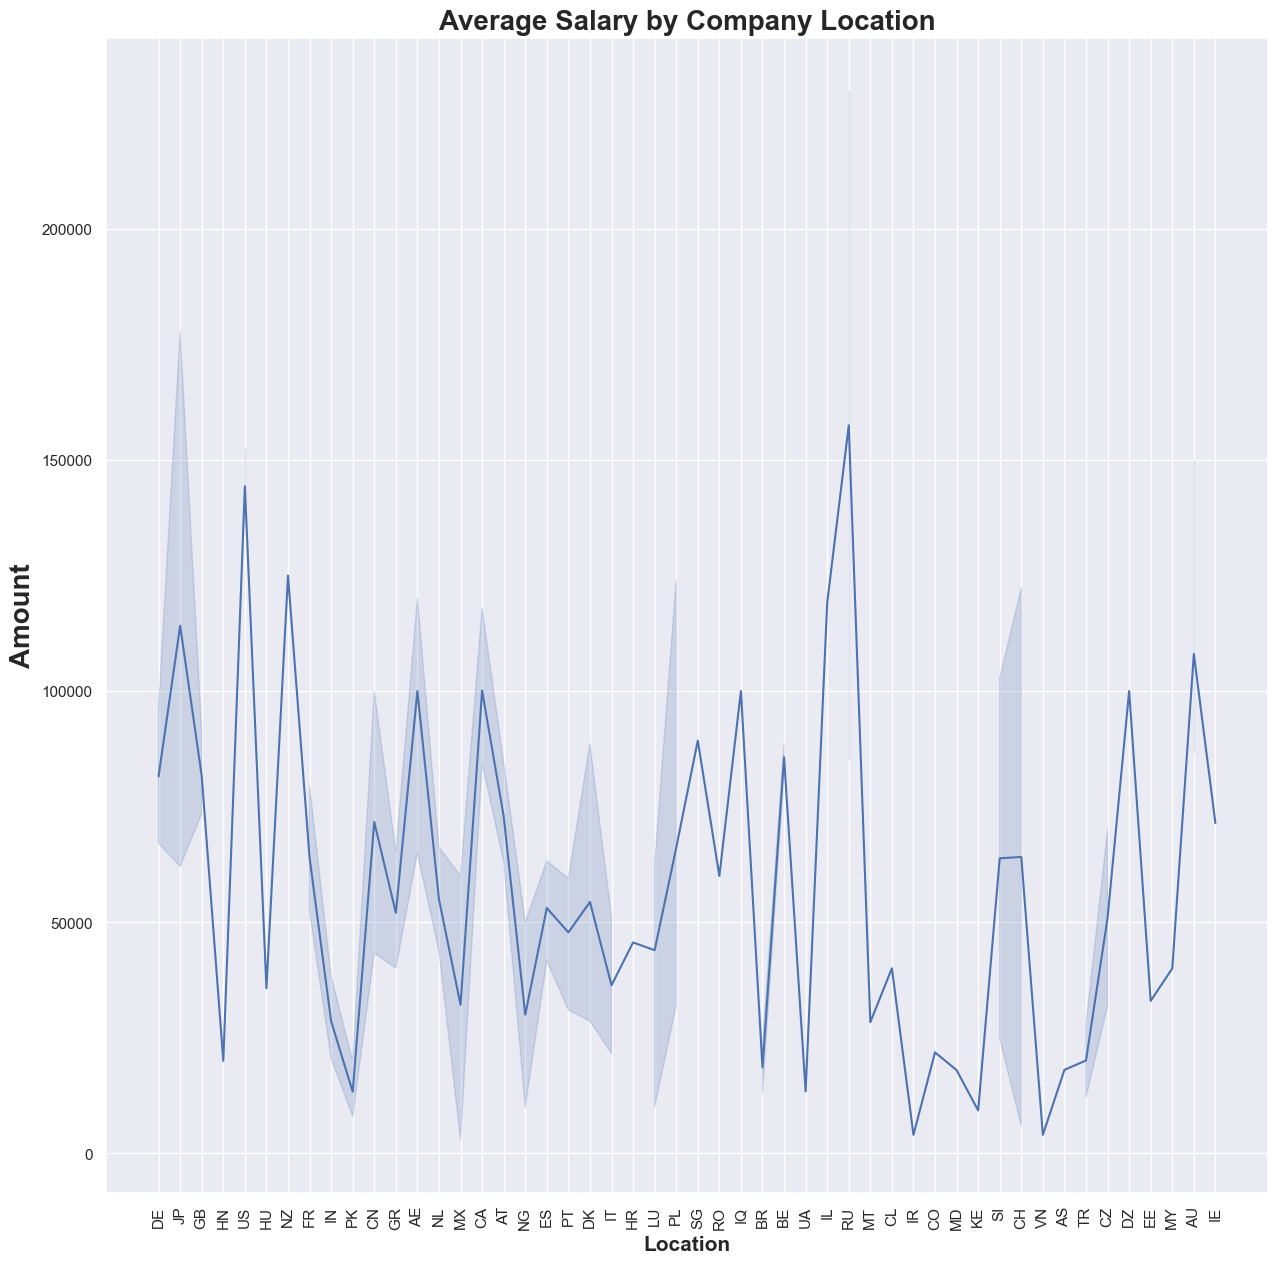

In [44]:
plt.figure(figsize=(15,15))
plt.title('Average Salary by Company Location', fontsize=20, fontweight='bold')
sns.lineplot(y='salary_in_usd', x='company_location', data=job_salaries)
plt.xlabel('Location', fontsize=15, fontweight='bold')
plt.ylabel('Amount', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

# Summary

- Most Data Science jobs require Senior-level/Expert experience level and very few positions are available for Executive-level/Directors.
- The most common job titles in the Data Science field are Data Scientist, Data Engineer, Data Analyst and Machine Learning Engineer.
- Most positions are Full-time employment.
- The Number of Data Science jobs and the salary are increasing with each year and experience-level.
- Medium-sized and Large-sized companies pay high salaries in comparison to small-sized companies.
- The average salary for Data Science Jobs in USD is 112,297.87.